## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Jmackalister/Data-Science-For-Beginners/main/data/diabetes.tsv",sep='\t')
df.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [7]:
# Calculate the mean and variance of all numeric columns

mean = df.mean()
variance = df.var()

# Create a new DataFrame with the results
results = pd.DataFrame({'Mean': mean, 'Variance': variance})

# Display the result
print(results.round(3))

       Media  Varianza
AGE   48.518   171.847
SEX    1.468     0.250
BMI   26.376    19.520
BP    94.647   191.304
S1   189.140  1197.717
S2   115.439   924.955
S3    49.788   167.294
S4     4.070     1.665
S5     4.641     0.273
S6    91.260   132.166
Y    152.133  5943.331


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

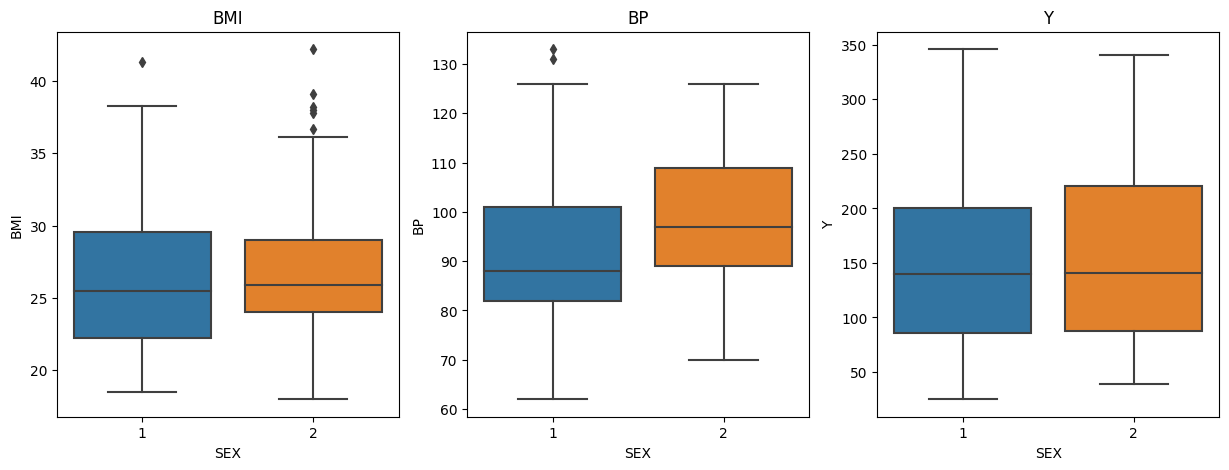

In [38]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the boxplots for BMI, BP, and Y depending on gender
sns.boxplot(x='SEX', y='BMI', data=df, ax=axes[0])
sns.boxplot(x='SEX', y='BP', data=df, ax=axes[1])
sns.boxplot(x='SEX', y='Y', data=df, ax=axes[2])

# Set the titles for the subplots
axes[0].set_title('BMI')
axes[1].set_title('BP')
axes[2].set_title('Y')

# Show the plot
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

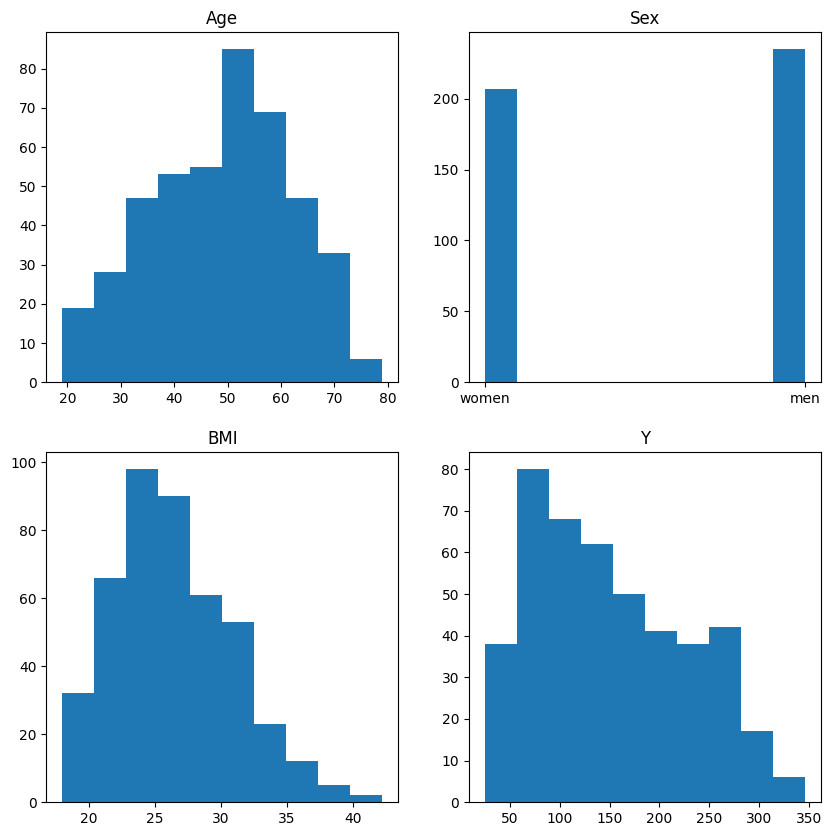

In [19]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Create histograms for the variables Age, Sex, BMI, and Y.
axes[0, 0].hist(df['AGE'])
axes[0, 1].hist(df['SEX'])
axes[1, 0].hist(df['BMI'])
axes[1, 1].hist(df['Y'])

# Set the titles for the subplots
axes[0, 0].set_title('Age')
axes[0, 1].set_title('Sex')
axes[1, 0].set_title('BMI')
axes[1, 1].set_title('Y')

# Show the plot
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

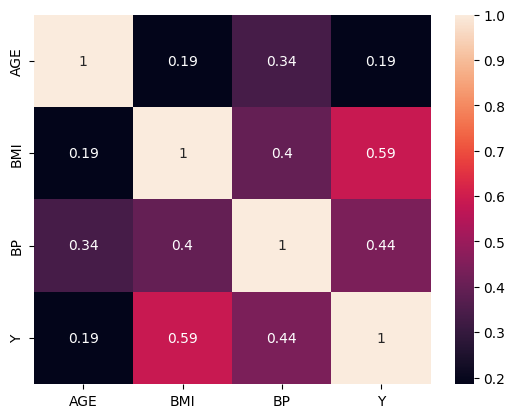

In [31]:
# Calculate the correlation between columns
corr = df[['AGE','BMI','BP','Y']].corr()

# Create a heatmap to show the correlation
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

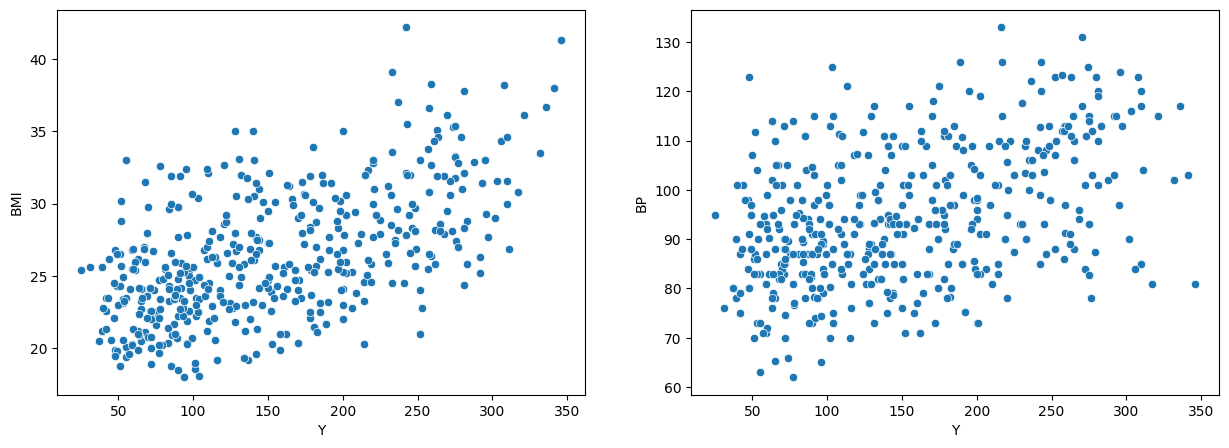

In [35]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the boxplots for BMI, BP, and Y depending on gender
sns.scatterplot(x='Y', y='BMI', data=df, ax=axes[0])
sns.scatterplot(x='Y', y='BP', data=df, ax=axes[1])

# Show the plot
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [36]:
df.groupby('SEX').agg({ 'Y' : 'mean'})

,Y
SEX,
1,149.021277
2,155.666667


In [40]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Y'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 152.13 ± 5.29
p=0.90, mean = 152.13 ± 6.04
p=0.95, mean = 152.13 ± 7.21


In [46]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']=='1',['Y']].fillna(method='pad'),p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']=='2',['Y']].fillna(method='pad'),p)
    print(f'Conf={p:.2f}, 1: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2 : {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1: nan..nan, 2 : nan..nan
Conf=0.90, 1: nan..nan, 2 : nan..nan
Conf=0.95, 1: nan..nan, 2 : nan..nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/

In [44]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']=='1',['Y']], df.loc[df['SEX']=='2',['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = nan
P-value: nan
